# Variational Autoencoder

GDT on Machine Learning


## Introduction


### Autoencoders
Autoencoders are:
- neural networks
- task of **'representation learning'** or **'data coding'**
- used in unsupervised manner

In particular: *imposing a bottleneck in the network, we force the model to learn a **compressed** representation of the original input*.

The aim of autoencoders is:
- *encoding*:
    - learn a representation (encoding) for the data
    - perform dimensionality reduction
- *decoding*:
    - generate from encodings
    - gereative models (VAE)
- *encoding-deconding*:
    - denoising
    - coding and decoding
    
Application of autoencoders are:
- data compression
- data inpainting and denoising
- information retrieval

#### Intuition

We can take
- an *unlabeled* dataset
- frame it as a supervised learning task
- output $\hat{x}$, a **reconstruction of the original input** $x$.

We use the following architecture
![autoencoders_bottleneck.png](./figures/autoencoders_bottleneck.png)

We can train the network by minimizing the loss function (*reconstruction error*), $\mathcal{L}(\hat{x}, x)$. It measure the difference between the input and tho consequent reconstruction.

The *bottleneck* is the key:

- without a bottleneck, our model could easily learn how to copy/memorize the input values.
- with bottleneck, we constrain the amount of information that can traverse the full network
- we force the model to learn a comperession of the input.

#### Relationship with PCA
If linear activation are used (or only a single sigmoid-hidden-layer), then the optimal solution to an autoencoder is strongly related to PCA.

The weights of a AE with single hidden layer of size $h$, where $h <  D$ span the same vector subspace as the one spanned by the first $p$ principal components, and the output of the AE is an orthogonal projection onto this subspace.

The weight $\mathbf{W}_\text{AE}$ are not equal to the principal componets, and are in general not-orthogonal; but the principal components may be recovered from then using SVD.

#### Linear Autoencoders do PCA
##### recall of PCA (form [1])
Let be $\mathbf{Y} = \{\mathbf{y}_i\}_{i=0}^{N-1} \in \mathbb{R}^{D \times N}$ a set of $N$ observations, each of dimension $D$, with $D << N$.

Let be $\bar{\mathbf{y}} = \frac{1}{N} \sum_i \mathbf{y_i}$ the centroid and,

Let be $\mathbf{Y}_0 = \mathbf{Y} - \bar{\mathbf{y}}$ the centred observations.

Let be $\mathbf{W} \in \mathbb{R}^{L \times D}$ a linear transformation of a finite dimensional vector:
$$\mathbf{x}_i = \mathbf{W}^T \mathbf{y}_i$$
where $\mathbf{x}_i \in \mathbb{R}^{L}$, that is $\mathbf{X} = \mathbf{W}^T \mathbf{Y}$.

When $\mathbf{W}$ represent the transformation that applies PCA, denoted $\mathbf{W} = \mathbf{P}$, then the column of $\mathbf{P}$:
- $\{ \mathbf{p}_i \}_{i=0}^{D-1}$ are refered to as *loading vectors*
- the transformed vectors $\mathbf{x}_{i=0}^{N-1}$ are refered to as *principal components*.

The first loading vector is defined as the *unit vector which the inner product of the observations have the greatest variance*:
$$ \mathbf{p}_1 = \text{max}_{\mathbf{w}_1} \mathbf{w}_1 \mathbf{Y}_0 \mathbf{Y}_0^T \mathbf{w}_1 \; \; s.t. \mathbf{w}_1^T\mathbf{w}_1=1$$

In general all the vector of the matrix $\mathbf{P}$ can be computed by diagonalizing the covariance matrix:
$$\mathbf{Y}_0\mathbf{Y}_0^T = \mathbf{P}\mathbf{\Lambda}\mathbf{P}^{-1} = \mathbf{P}\mathbf{\Lambda}\mathbf{P}^{T}$$ 
Where $\mathbf{\Lambda} = \mathbf{X}_0\mathbf{X}_0^T$ is a diagonal matrix and the column of $\mathbf{P}$ are orthonormals, i.e. $\mathbf{P}^{-1} = \mathbf{P}^T$

PCA is often used for dimensionality reduction, this is done by simply keeping the $L$ principal components $L << D$, that is 
$$ \mathbf{X}_L = \mathbf{P}_L^T \mathbf{Y}$$
where each column of $\mathbf{X}_L \in \mathbb{R}^{D \times N}$ is a vector of the first $L$ principal components.

Interestingly, $\mathbf{P}_L$ is also the solution to:
$$ \text{min}_{\mathbf{W}\in \mathbb{R}^{D \times L}} \;\;|| \mathbf{Y}_0 - \mathbf{W}\mathbf{W}^T \mathbf{Y}_0 ||_\mathcal{F}^2 \;\; s.t. \mathbf{W}^T\mathbf{W} = \mathbf{I}_{L \times L}$$
where $\mathcal{F}$ is the Frobenius norm.

According to this formulation, the relsulting $L$ vectors are an orthonormal basis which spans the $L$ dimensional subspace onto which the projections of the centred observations have the mininum squared difference from the original centred observation. 

However the minimizer of such equation is not unique: $\mathbf{W} = \mathbf{P}_L \mathbf{Q}$ is also a solution for every $\mathbf{Q} \in \mathbb{R}^{L \times L}$ orthogonal.
We can find defrrent orthonormal basis for the same subspace.

##### Linear Autoencoders
In case of no  non-linear activation functions is used, the linear autoencoder applies the following two functions:
- the encoding $\mathbf{h}_i = \mathbf{W}_1 \mathbf{y}_i + \mathbf{b}_1$
- the decoding $\hat{\mathbf{y}_i} = \mathbf{W}_2 \mathbf{y}_i + \mathbf{b}_2$
The the loss fuction is:
$$ \text{min}_{\mathbf{\theta}} || \mathbf{Y} - ( \mathbf{W}_2 (\mathbf{W}_1 \mathbf{Y} + \mathbf{b}_1) + \mathbf{b}_2) ||_{\mathcal{F}}^2$$
where $\theta = \{ \mathbf{W}_1, \mathbf{W}_2, \mathbf{b}_1, \mathbf{b}_2\}$ are the network parameters.

Minimizing this, is equivalent to minizing the following [2]:
$$ \text{min}_{\mathbf{\theta}} || \mathbf{Y}_0 - \mathbf{W}_2 \mathbf{W}_1 \mathbf{Y}_0 ||_{\mathcal{F}}^2$$

When solving the gradieng we have the following:
$$ \mathbf{W}_1 = \mathbf{W}_2^t = (\mathbf{W}_2^T\mathbf{W}_2)^{-1}\mathbf{W}_2^T$$
Thus, we have to minimize w.r.t a single matrix:
$$ \text{min}_{\mathbf{\theta}} || \mathbf{Y}_0 - \mathbf{W}_2 \mathbf{W}_2^t \mathbf{Y}_0 ||_{\mathcal{F}}^2$$

The matrix $\mathbf{W}_2 \mathbf{W}_2^t = \mathbf{W}_2(\mathbf{W}_2^T\mathbf{W}_2)^{-1}\mathbf{W}_2^T$ is the orthogonal projection operator onto the column space of $\mathbf{W}_2$ when its columns are not necessarily orthonormal.
This problem is very similar to the one we defined before, but without orthonormality constraint.

The linear autoencoder is said to apply PCA to the input in the sense that its output is a projection of the data onto the low dimensional principal subspace.
However unlike the PCA, the coordinates of the output of the bottleneck are correlated and are not sorted in descending order of variance.

So it is not recoverding the loading vectorts $\mathbf{P}_L$, buth rather $\mathbf{P}_L\mathbf{Q}$ for some orthogonal matrix $\mathbf{Q}$.

## Reference
1. [From Principal Subspaces to Principal Components with Linear Autoencoders](https://arxiv.org/pdf/1804.10253.pdf)
2. [Auto-Association by Multilayer Perceptrons and Singular Value Decomposition](http://geza.kzoo.edu/~erdi/ML/bourlard-kamp88.pdf)

##### Example with the IRIS dataset
###### PCA first
Let's load the IRIS dataset and run PCA and plot the first 2 components against each other.

input dimension (150, 4)
label dimension (150,)


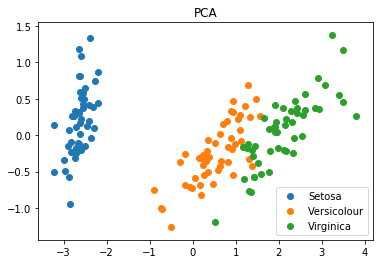

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

print('input dimension', X.shape)
print('label dimension', y.shape)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)


plt.scatter(X[y==0,0], X[y==0,1], label='Setosa')
plt.scatter(X[y==1,0], X[y==1,1], label='Versicolour')
plt.scatter(X[y==2,0], X[y==2,1], label='Virginica')
plt.title("PCA")
plt.legend()
plt.show()

##### Now with a AE
let's try with a very simple network with 3 layers (enconding, hidden and decoding) with linear activation

Training finished


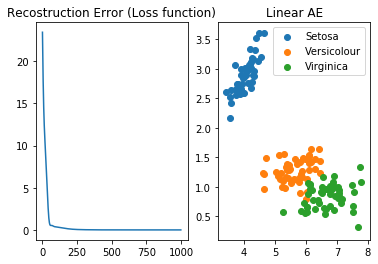

In [3]:
import torch
import torch.nn as nn
from torch.autograd import Variable
np.random.seed(5)

class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(4, 2))
        self.decoder = nn.Sequential(
            nn.Linear(2, 4))

    def forward(self, x, output_encoder=False):
        x = self.encoder(x)
        # linear activation function
        if output_encoder:
            return x
        x = self.decoder(x)
        # linear activation function
        return x

# definition
n_epochs = 1000
inputs = Variable(torch.Tensor(iris.data).float())

model = autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), 
                             lr=0.01)

# training
loss_tracker = np.zeros(n_epochs)
for epoch in range(n_epochs):
    # ===================forward=====================
    outputs = model(inputs)
    loss = criterion(outputs, inputs)
    # ===================backward====================
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_tracker[epoch] = loss.item()

print('Training finished')
outputs = model(inputs, output_encoder=True)
X = outputs.data.numpy()

fig, axarr = plt.subplots(1,2)
axarr[0].plot(loss_tracker)
axarr[0].set_title('Recostruction Error (Loss function)')

axarr[1].scatter(X[y==0,0], X[y==0,1], label='Setosa')
axarr[1].scatter(X[y==1,0], X[y==1,1], label='Versicolour')
axarr[1].scatter(X[y==2,0], X[y==2,1], label='Virginica')
axarr[1].legend()
axarr[1].set_title("Linear AE")
plt.show()

Essentially this structure approximates PCA by reducing the data from four features to two features in the hidden layer.

**take home message**: A single layer auto encoder with linear transfer function is nearly equivalent to PCA, where nearly means that the $W$ found by AE and PCA won't be the same. However the subspace spanned by the respective $W$'s will.
[proof here](https://arxiv.org/pdf/1804.10253.pdf)

#### Trade off in Autoencoders
the idea AE model should balances the followings:
- sensitive to the inputs enough to accurately build a reconstruction
- insensitive to the inputs enough that the model doesn't simply memorize or overfit

More than tweaking parameters (such as $H$), in most of the case this involves constructing a loss function with a regularizer:

$$J(\mathbf{x}, \hat{\mathbf{x}}) = \mathcal{L}(\mathbf{x}, \hat{\mathbf{x}}) + \beta P(\theta)$$
where $P$ is denote as regularizer and $\beta$ is the regularization term to adjust the trade-off between the two functions.

#### Variations
- **Undercomplete AutoEncoders**:
    - just a constrain on the number of nodes present in the hidden layer(s): no explicit regularization terms.
    - ideally, **this encoding will learn and describe latent attributes of the input data.**
    - why it works?
        - NN are capable of learning nonlinear relationships in the data. This can be tought as a powerful (nonlinear) gerenalization of PCA.
            - PCA attemps to discover a lower dimensional hyperplanes which decribes the original data
            - AE are capable of **learning nonlinear manifolds** (in very *simple* terms, a continuous, non instersecting surface)

![pca_vs_ae](./figures/pca_ae_manifold.png)

- **Sparse Autoencoders**:
    - here the reduction of number of nodes in the bottleneck is not required
    - we build the cost function such we penalize *activations* within the layer: for any inputs, we will encourange our network to learn an encoding and decoding map which only relies on activating a small number of neurons.
        - for UAE: the entire network is used for each input
        - for SAE: selected active regions of the network are used depending on the input, so that
            - limited network capacity to copy the data
            - no limited network capacity to extract features
    - regularization:
        - L1 regularization:
        $$\mathcal{L}(\mathbf{x}, \hat{\mathbf{x}} + \beta \sum_i | a_i^{(h)}| $$
        adding a term to our loss function that penalizes the absolute value of the vector of activations $a$ in layer $h$ of observation $i$, scaled by a tuning parameter $\beta$

- **Denoising Autoencoders**
So far the input and the output were choose identical, so that the task is reproducing the input as closely as possible while passing through some sort of information bottleneck.

Another approach is to sighlily corrupt the input but still maintain the uncorrupted data as our target output.

![denoising](./figures/autoencoders_denoising.png)

Now the input and the target output are no longer the same.
Now the model learns a **vector fields** mapping the input towards a lower-dimensional manifold. If this manifold accurately describes the natural data, we can canell out the added noise.

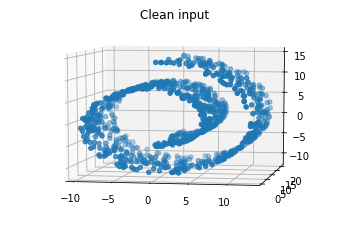

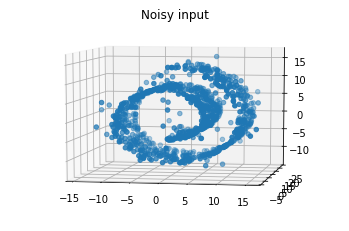

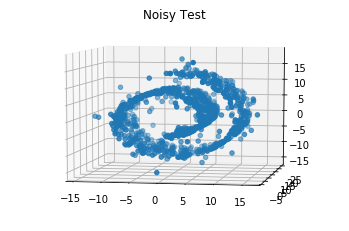

In [3]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import random

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(5)

class autoencoder_denoising(nn.Module):
    def __init__(self):
        super(autoencoder_denoising, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(3, 5), nn.Tanh(), 
            nn.Linear(5, 10), nn.Tanh(), 
            nn.Linear(10, 5), nn.Tanh(), 
            nn.Linear(5, 3), nn.Tanh())
        self.decoder = nn.Sequential(
            nn.Linear(3, 5), nn.Tanh(),
            nn.Linear(5, 10), nn.Tanh(), 
            nn.Linear(10, 5), nn.Tanh(), 
            nn.Linear(5, 3))

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# clean data
n_sample = 1000
X_clean, _ = datasets.make_swiss_roll(n_sample)
# noise data
X_noise = X_clean.copy()
random_index = random.sample(range(1, n_sample), 100)
X_noise[random_index, :] += (10*np.random.random([100, 3])-5)

X_test = X_clean.copy()
random_index = random.sample(range(1, n_sample), 100)
X_test[random_index, :] += (10*np.random.random([100, 3])-5)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X_clean[:,0], X_clean[:, 1], X_clean[:, 2])
ax.view_init(7, -80)
ax.set_title("Clean input")
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X_noise[:,0], X_noise[:, 1], X_noise[:, 2])
ax.view_init(7, -80)
ax.set_title("Noisy input")
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X_test[:,0], X_test[:, 1], X_test[:, 2])
ax.view_init(7, -80)
ax.set_title("Noisy Test")
plt.show()

0 80.78221130371094
1000 41.71918869018555
2000 26.50994110107422
3000 16.860992431640625
4000 6.855747222900391
5000 3.859433889389038
6000 1.609354019165039
7000 1.0666905641555786
Training finished


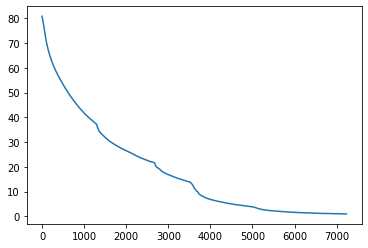

In [4]:
# definition
inputs_clean = Variable(torch.Tensor(X_clean).float())
inputs_noise = Variable(torch.Tensor(X_noise).float())
inputs_test  = Variable(torch.Tensor(X_test).float())

model = autoencoder_denoising()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), 
                             lr=0.001)

# training
loss_tracker = []
converged = False
epoch = 0
while not converged:
    # ===================forward=====================
    outputs = model(inputs_noise)
    loss = criterion(outputs, inputs_clean)
    # ===================backward====================
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_tracker.append(loss.item())
    if epoch%1000 == 0:
        print(epoch, loss.item())
    if loss_tracker[epoch] < 1:
        converged = True
    epoch += 1

print('Training finished')

plt.plot(loss_tracker)
plt.show()

In [5]:
# test
model.eval()
outputs = model(inputs_test)
X_pred = outputs.data.numpy()

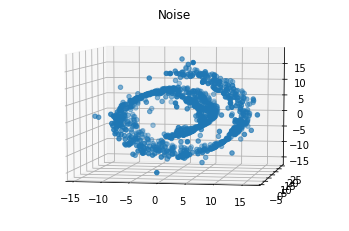

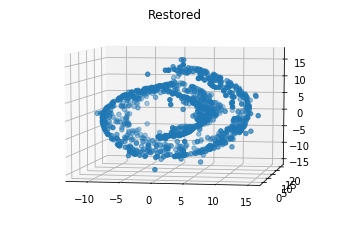

In [17]:
# visualization of the 3D manifold
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], X_test[:,2])
ax.view_init(7, -80)
ax.set_title('Noise')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pred[:,0], X_pred[:,1], X_pred[:,2])
ax.set_title('Restored')
ax.view_init(7, -80)

### Variational Autoencoder

Neural Networks:

- approximation of some functions we want to model
- data structure that holds information
    - imagine to train a NN from one_hotted vectors to images
    - adding more parameters in the network, it can memorize different images
    - the network learn the mapping from a latent vector (space) to our desired output (this is a pure decoder).

#### From a Lego point of view

We would like to build a generative model, not just a fuzzy data structure that can 'memorize' images.
How to generate? So far, we don't know how to create latent vectors other than encoding them from images.

In a Neural Network language, a variational autoencoder consists:
- an encoder is a neural network
    - projecting onto a a latent space, the bottleneck, which is a lower-dimesional stochastic space $Q(z | x ; \theta_Q)$
- a decoder
    - decodes the latent variable $z$ into the input space $P(x | z ; \theta_P)$
![autoencoders_variational.png](./figures/autoencoders_variational.png)
- a loss function.
    - negativity log likelihood (data-fit criterium) with a regularizer: 
    $$\mathcal{L}(\theta_Q, \theta_P) = - \mathbb{E}_{z \sim Q(z | x_i; \theta_Q)} [\log P( x_i | z ; \theta_P) ] + \mathcal{D}_{KL} ( Q(z | x_i ; \theta_Q) || P(z) )$$
    - the first term is the recontstruction loss, with respect the encoder's distribution over all the rapresentations
        - encurange the decoder to learn the reconstruction of the data
        - if the decorder's output does not reconstruct the data well, statistically we say that the decoder parameterizes a likelihood distributions that does not match the prob distr of the true data
        
    - the second term is a regularizer.
        - the $\mathcal{D}_{KL}$ is the Kullback-Leibler divergence between the encoder distrubution $Q(z | x ; \theta_Q)$ and $P(z)$.
            - it measure how much info is lost when using $Q$ to represent $P$.
            - how much $Q \sim P$

HP: in Variational Autoencoder $P \sim \mathcal{N}(0, 1)$

Why?
- Any arbitrary distribution in $L$ dimensions can be generated by $L$ normally distributed varibles and mapping them throught a sufficiently complicated function.
- keep each latent variable similar. The KL div force the latent space to be Gaussian
    - that are i.i.d., which has means 'keep the representations $z$ sufficiently diverse'.
    - otherwise the encoder-decoder could cheat and 'memorize' each image in a euclidean space
        - image of a cat in the living room could have a different representation of a cat in a garden, now they should be sufficiently close

#### Probability perspective
The aim of the autoencoder, of generative model in general, is to maximize $P(x)$, so that we can generate from it.

- we use the tipical formula:
$$ P(X) = \int P(X | z ; \theta) P(z) dz$$

A generative process can be seen as follows:
- drawn a latent varible $z_i \sim P(z)$
- drawn a datapoint varible $X_i \sim P(X | z)$

So 
- The latent variable are draw from $P(z)$, a prior distribution
- The data $X$ have a likelihood $P( X | z) $ that is conditioned on the latet variables

In [26]:
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn.functional as F

device = torch.device("cuda" if False else "cpu")

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.ToTensor()),
    batch_size=128, shuffle=True)


class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.fc1 = nn.Linear(784, 400)
        self.fc21 = nn.Linear(400, 20)
        self.fc22 = nn.Linear(400, 20)
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, 784)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar


model = VAE().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD


def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))


def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            data = data.to(device)
            recon_batch, mu, logvar = model(data)
            test_loss += loss_function(recon_batch, data, mu, logvar).item()
            
    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))

Train Epoch: 1 [0/60000 (0%)]	Loss: 548.843872
Train Epoch: 1 [12800/60000 (21%)]	Loss: 183.497467
Train Epoch: 1 [25600/60000 (43%)]	Loss: 151.667847
Train Epoch: 1 [38400/60000 (64%)]	Loss: 136.473816
Train Epoch: 1 [51200/60000 (85%)]	Loss: 133.234146
====> Epoch: 1 Average loss: 164.6444
====> Test set loss: 127.2917


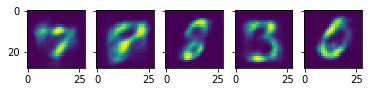

Train Epoch: 2 [0/60000 (0%)]	Loss: 127.365067
Train Epoch: 2 [12800/60000 (21%)]	Loss: 124.820328
Train Epoch: 2 [25600/60000 (43%)]	Loss: 122.403603
Train Epoch: 2 [38400/60000 (64%)]	Loss: 117.578499
Train Epoch: 2 [51200/60000 (85%)]	Loss: 114.273727
====> Epoch: 2 Average loss: 121.2322
====> Test set loss: 115.4477


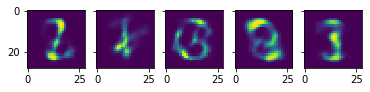

Train Epoch: 3 [0/60000 (0%)]	Loss: 117.570885
Train Epoch: 3 [12800/60000 (21%)]	Loss: 116.410370
Train Epoch: 3 [25600/60000 (43%)]	Loss: 114.757225
Train Epoch: 3 [38400/60000 (64%)]	Loss: 111.805199
Train Epoch: 3 [51200/60000 (85%)]	Loss: 113.559502
====> Epoch: 3 Average loss: 114.4401
====> Test set loss: 111.7728


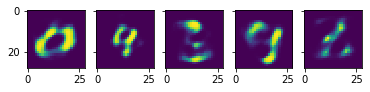

Train Epoch: 4 [0/60000 (0%)]	Loss: 116.355209
Train Epoch: 4 [12800/60000 (21%)]	Loss: 114.449051
Train Epoch: 4 [25600/60000 (43%)]	Loss: 109.419563
Train Epoch: 4 [38400/60000 (64%)]	Loss: 105.355675
Train Epoch: 4 [51200/60000 (85%)]	Loss: 114.884338
====> Epoch: 4 Average loss: 111.5981
====> Test set loss: 109.6259


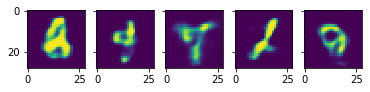

Train Epoch: 5 [0/60000 (0%)]	Loss: 111.002716
Train Epoch: 5 [12800/60000 (21%)]	Loss: 109.046700
Train Epoch: 5 [25600/60000 (43%)]	Loss: 111.471588
Train Epoch: 5 [38400/60000 (64%)]	Loss: 111.713959
Train Epoch: 5 [51200/60000 (85%)]	Loss: 109.632462
====> Epoch: 5 Average loss: 109.9031
====> Test set loss: 108.4767


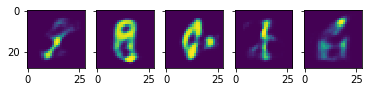

Train Epoch: 6 [0/60000 (0%)]	Loss: 112.901062
Train Epoch: 6 [12800/60000 (21%)]	Loss: 108.977776
Train Epoch: 6 [25600/60000 (43%)]	Loss: 106.833908
Train Epoch: 6 [38400/60000 (64%)]	Loss: 109.118782
Train Epoch: 6 [51200/60000 (85%)]	Loss: 107.478401
====> Epoch: 6 Average loss: 108.6832
====> Test set loss: 107.6757


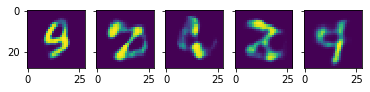

Train Epoch: 7 [0/60000 (0%)]	Loss: 109.691895
Train Epoch: 7 [12800/60000 (21%)]	Loss: 109.065857
Train Epoch: 7 [25600/60000 (43%)]	Loss: 105.407494
Train Epoch: 7 [38400/60000 (64%)]	Loss: 108.385918
Train Epoch: 7 [51200/60000 (85%)]	Loss: 112.306595
====> Epoch: 7 Average loss: 107.8802
====> Test set loss: 106.8422


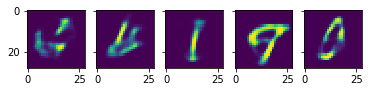

Train Epoch: 8 [0/60000 (0%)]	Loss: 107.806290
Train Epoch: 8 [12800/60000 (21%)]	Loss: 108.224533
Train Epoch: 8 [25600/60000 (43%)]	Loss: 109.699257
Train Epoch: 8 [38400/60000 (64%)]	Loss: 107.100243
Train Epoch: 8 [51200/60000 (85%)]	Loss: 111.679092
====> Epoch: 8 Average loss: 107.2008
====> Test set loss: 106.4393


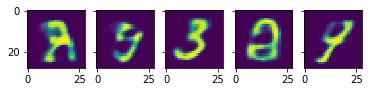

Train Epoch: 9 [0/60000 (0%)]	Loss: 109.039116
Train Epoch: 9 [12800/60000 (21%)]	Loss: 104.386803
Train Epoch: 9 [25600/60000 (43%)]	Loss: 106.744240
Train Epoch: 9 [38400/60000 (64%)]	Loss: 105.074783
Train Epoch: 9 [51200/60000 (85%)]	Loss: 105.363068
====> Epoch: 9 Average loss: 106.6711
====> Test set loss: 105.9973


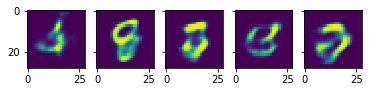

Train Epoch: 10 [0/60000 (0%)]	Loss: 109.311447
Train Epoch: 10 [12800/60000 (21%)]	Loss: 111.316559
Train Epoch: 10 [25600/60000 (43%)]	Loss: 107.148933
Train Epoch: 10 [38400/60000 (64%)]	Loss: 103.772896
Train Epoch: 10 [51200/60000 (85%)]	Loss: 107.304337
====> Epoch: 10 Average loss: 106.2730
====> Test set loss: 105.6415


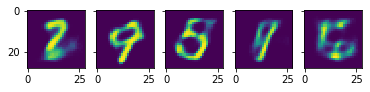

Train Epoch: 11 [0/60000 (0%)]	Loss: 102.686737
Train Epoch: 11 [12800/60000 (21%)]	Loss: 107.245293
Train Epoch: 11 [25600/60000 (43%)]	Loss: 103.329536
Train Epoch: 11 [38400/60000 (64%)]	Loss: 105.773010
Train Epoch: 11 [51200/60000 (85%)]	Loss: 107.257095
====> Epoch: 11 Average loss: 105.9220
====> Test set loss: 105.3230


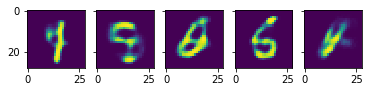

Train Epoch: 12 [0/60000 (0%)]	Loss: 107.547310
Train Epoch: 12 [12800/60000 (21%)]	Loss: 108.345924
Train Epoch: 12 [25600/60000 (43%)]	Loss: 107.587479
Train Epoch: 12 [38400/60000 (64%)]	Loss: 109.293793
Train Epoch: 12 [51200/60000 (85%)]	Loss: 106.912933
====> Epoch: 12 Average loss: 105.5961
====> Test set loss: 105.0748


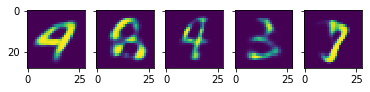

Train Epoch: 13 [0/60000 (0%)]	Loss: 105.759293
Train Epoch: 13 [12800/60000 (21%)]	Loss: 103.553749
Train Epoch: 13 [25600/60000 (43%)]	Loss: 108.650169
Train Epoch: 13 [38400/60000 (64%)]	Loss: 106.529274
Train Epoch: 13 [51200/60000 (85%)]	Loss: 100.954361
====> Epoch: 13 Average loss: 105.3233
====> Test set loss: 104.7497


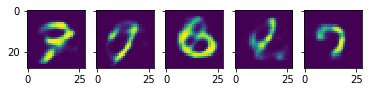

Train Epoch: 14 [0/60000 (0%)]	Loss: 104.703079
Train Epoch: 14 [12800/60000 (21%)]	Loss: 107.352295
Train Epoch: 14 [25600/60000 (43%)]	Loss: 104.592499
Train Epoch: 14 [38400/60000 (64%)]	Loss: 104.444427
Train Epoch: 14 [51200/60000 (85%)]	Loss: 104.464783
====> Epoch: 14 Average loss: 105.0796
====> Test set loss: 104.8372


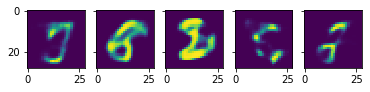

Train Epoch: 15 [0/60000 (0%)]	Loss: 105.583710


In [ ]:
n_samples = 5

for epoch in range(1, 20):
    train(epoch)
    test(epoch)
    with torch.no_grad():
        sample = torch.randn(n_samples, 20).to(device)
        sample = model.decode(sample).cpu()
        fig, axarr = plt.subplots(1, n_samples, sharey=True)
        for s in range(n_samples):
            smp = sample[s, ...]
            axarr[s].imshow(smp.view(1, 28, 28).data.numpy().squeeze())
        plt.show()